In [619]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import random
from scipy.stats import scoreatpercentile
from util import load_sample

import warnings
warnings.filterwarnings("ignore")

In [539]:
def skip(i,fraction=0.01):
    if i == 0:
        return False  # precisamos manter o row=0 para ter o header
    else:
        return random.random() > fraction

In [670]:
#alterar para o o arquivo {{enem_1_ano}}
%time df = pd.DataFrame(load_sample(2010, 20000))
df.columns

CPU times: user 704 ms, sys: 16 ms, total: 720 ms
Wall time: 716 ms


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ENSINO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       ...
       'Q48', 'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57'],
      dtype='object', length=105)

In [672]:
df_sal = df["Q04"].astype({'Q04':'string'})
df_sal

613      C
1636     B
8452     B
6478     B
12286    B
        ..
8860     B
15832    B
16147    B
24422    A
21665    B
Name: Q04, Length: 20000, dtype: string

<AxesSubplot:xlabel='Q04', ylabel='Count'>

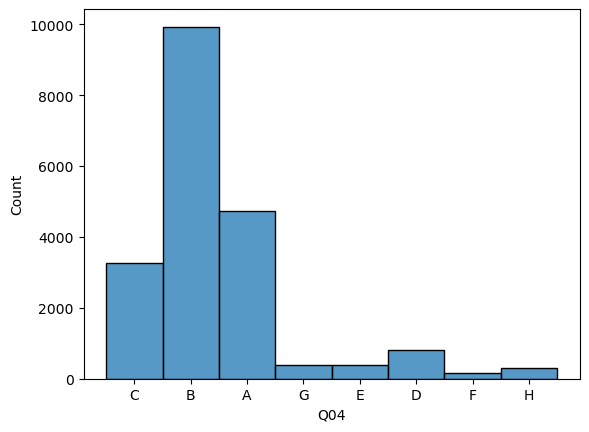

In [683]:
sns.histplot(df_sal)

In [675]:
df_sal_cn = pd.DataFrame(df[['Q04', 'NU_NOTA_CN']])

df_2 = pd.DataFrame(df_sal_cn.groupby(by='Q04')['NU_NOTA_CN'].quantile(q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

df_2.describe()

,NU_NOTA_CN
count,80.000000
mean,553.138250
std,105.111366
min,366.280000
25%,478.100000
50%,544.610000
75%,616.400000
max,796.300000


[Text(0.5, 1.0, 'Distribuição de notas por salário')]

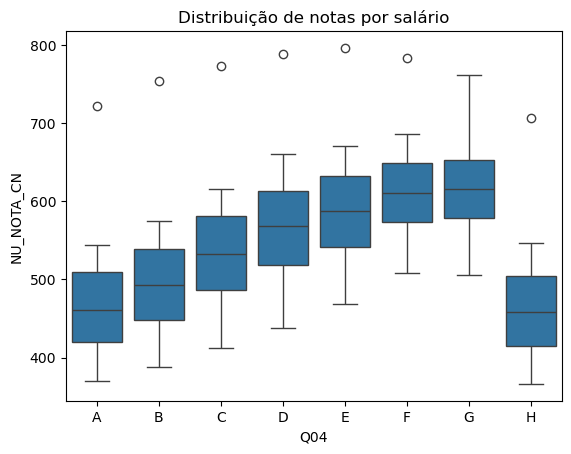

In [676]:
plot_1 = sns.boxplot(df_2, x='Q04', y='NU_NOTA_CN')
plot_1.set(title = 'Distribuição de notas por salário')

In [678]:
df_escm_cn = pd.DataFrame(df[['Q04', 'NU_NOTA_CN']])

df_3 = pd.DataFrame(df_escm_cn.groupby(by='Q04')['NU_NOTA_CN'].quantile(q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

df_3

NU_NOTA_CN
Q04                
A   0.1      369.60
    0.2      394.16
    0.3      414.74
    0.4      434.02
    0.5      451.70
...             ...
H   0.6      467.38
    0.7      486.16
    0.8      509.98
    0.9      546.30
    1.0      706.90

[80 rows x 1 columns]

[Text(0.5, 1.0, 'Distribuição de notas por escolaridade da mãe')]

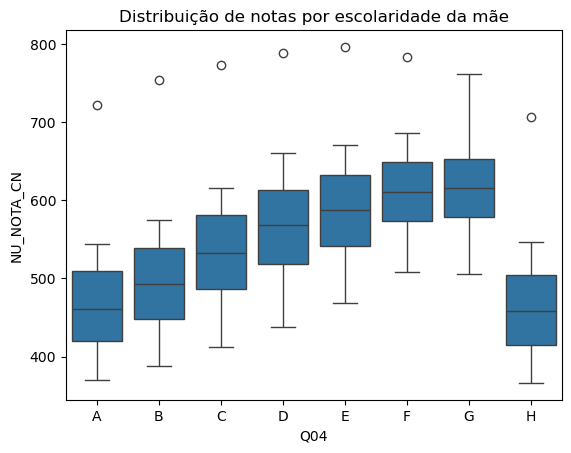

In [679]:
plot_2 = sns.boxplot(df_3, x='Q04', y='NU_NOTA_CN')
plot_2.set(title = 'Distribuição de notas por escolaridade da mãe')

In [681]:
df_escp_cn = pd.DataFrame(df[['Q04', 'NU_NOTA_CN']])

df_4 = pd.DataFrame(df_escp_cn.groupby(by='Q04')['NU_NOTA_CN'].quantile(q = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

df_4

NU_NOTA_CN
Q04                
A   0.1      369.60
    0.2      394.16
    0.3      414.74
    0.4      434.02
    0.5      451.70
...             ...
H   0.6      467.38
    0.7      486.16
    0.8      509.98
    0.9      546.30
    1.0      706.90

[80 rows x 1 columns]

[Text(0.5, 1.0, 'Distribuição de notas por escolaridade do pai')]

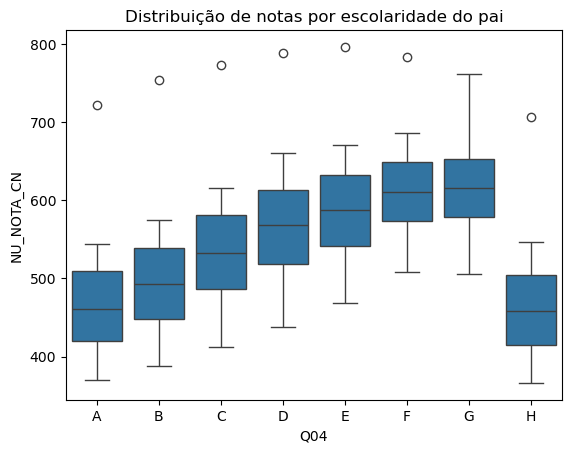

In [682]:
plot_3 = sns.boxplot(df_4, x='Q04', y='NU_NOTA_CN')
plot_3.set(title = 'Distribuição de notas por escolaridade do pai')

In [594]:
df['Q004'] = df['Q004'].astype(str)
x = df['Q004']
y = df['NU_NOTA_CN']

x

31011    A
31244    D
18915    A
9325     F
18303    D
        ..
19722    F
20277    D
27634    B
12744    B
23546    F
Name: Q004, Length: 20000, dtype: object

In [667]:
#Work in progress - To tentando reproduzir o gráfico do NYT
df_sal = df[["Q04", 'NU_NOTA_CN']].astype({'Q04': "string", 'NU_NOTA_CN': int})
df_sal

dff_a = df_sal[df_sal['Q04'].str.contains("A")]
dff_b = df_sal[df_sal['Q04'].str.contains("B")]
dff_c = df_sal[df_sal['Q04'].str.contains("C")]
dff_d = df_sal[df_sal['Q04'].str.contains("D")]
dff_e = df_sal[df_sal['Q04'].str.contains("E")]
dff_f = df_sal[df_sal['Q04'].str.contains("F")]

In [668]:
per = list(range(1, 101))
q_a = [scoreatpercentile(dff_a['NU_NOTA_CN'], i) for i in per]
q_b = [scoreatpercentile(dff_b['NU_NOTA_CN'], i) for i in per]
q_c = [scoreatpercentile(dff_c['NU_NOTA_CN'], i) for i in per]
q_d = [scoreatpercentile(dff_d['NU_NOTA_CN'], i) for i in per]
q_e = [scoreatpercentile(dff_e['NU_NOTA_CN'], i) for i in per]
q_f = [scoreatpercentile(dff_f['NU_NOTA_CN'], i) for i in per]

df_q4 = pd.DataFrame({'percentile': per, 'value_a': q_a, 'value_b': q_b, 'value_c': q_c, 'value_d': q_d, 'value_e': q_e, 'value_f': q_f, }, 
                     columns=['percentile', 'value_a', 'value_b', 'value_c', 'value_d', 'value_e', 'value_f'])

df_q4

,percentile,value_a,value_b,value_c,value_d,value_e,value_f
0,1,314.00,321.00,338.00,361.00,370.49,438.1
1,2,325.00,337.00,356.00,377.00,392.62,448.3
2,3,335.00,348.00,371.00,383.33,399.96,470.0
3,4,341.00,355.36,380.00,393.88,406.32,470.8
4,5,346.00,362.00,386.15,408.55,419.00,477.5
...,...,...,...,...,...,...,...
95,96,573.00,605.64,646.28,695.00,694.36,720.2
96,97,582.00,615.00,656.00,704.01,699.51,726.4
97,98,596.00,625.00,669.00,716.12,711.36,730.6
98,99,612.04,644.00,687.00,727.00,726.89,742.7


In [1]:
df_q4.plot.area(x = 'percentile', stacked = False)
print("Teste")

NameError: name 'df_q4' is not defined